# MIS 307 Project Phase 4 Final Report

Group: PB2

Group Members: Jason R. Koromo, Brady Shay, Matthew Vinup,  & Hogan Lee

(Markdown 1)
## TITLE: Hospital Data Analytic System


# 1. Project Description

Hospitals need a healthcare data analytic system which will help caregivers and administrators to make better medical and financial decisions while still delivering an ever-increasing quality of patient care. There are at least two reasons that encourage the healthcare industry to embrace the analytical system: a value-based care model which rewards them based on the health of their patient populations, and evidence-based information which will increase efficiencies and help sharpen our understanding of the best practices associated with any disease, injury or illness.

**This project aims to create an interactive program to describe the characteristics of customers (patients) in a hospital network and evaluate the performance of providers of medical services (for both of doctors and institutions)**.

In healthcare industry, there are various sources for data including hospital records, medical records of patients, results of medical examinations, devices that are a part of internet of things and biomedical research. This project, however, is limited to medical records of patients and caregivers’ information.

The project used the data from the Observational Medical Outcomes Partnership (OMOP) Common Data Model (CDM) which enables the capture of information (e.g., encounters, patients, providers, diagnoses, drugs, measurements and procedures) in the same way across different institutions(https://chime.ucsf.edu/observational-medical-outcomes-partnership-omop). The data collection site was a hospital located in South Eastern USA.  **The project used 5 datasets (patient demographic, provider, care site, visit, and medical condition) which included data for 140 patients, 66 doctors, 13 care sites, 2452 visits, and 8912 medical conditions.**

**Major fuctionality included 1) read and write 5 hospital datasets, 2) list all tables name in the database of Hospital, 3)
build data updating system, 4) calculate average visits per patient and determine any gender difference in visits, 5) develop Annual Reports and 6) list top 10 most frequent medical conditions.**


# 2. Implementation

# 2.1. Preparing Data

In [ ]:
##Cell 1
import pandas as pd
import sqlite3

#Create connection
conn = sqlite3.connect(database='hospital.db')
c = conn.cursor()

2.1.1. Registered Patient Data

In [7]:
##Cell2

#Read person data, create person table, and insert data into table

person_df = pd.read_csv('Person.csv')

c.execute('''DROP TABLE IF EXISTS person;''')

c.execute('''CREATE TABLE person (
person_id	INT	,
gender_concept_id	INT	,
year_of_birth	INT	,
month_of_birth	INT	,
day_of_birth	INT	,
datetime_of_birth	TEXT	,
race_concept_id	INT	,
ethnicity_concept_id	INT	,
location_id	INT	,
provider_id	INT	,
care_site_id	INT	,
person_source_value	TEXT	,
gender_source_value	TEXT	,
gender_source_concept_id	INT	,
race_source_value	TEXT	,
race_source_concept_id	INT	,
ethnicity_source_value	TEXT	,
ethnicity_source_concept_id	INT	
  ) ;''')
conn.commit()

#Insert person_df data into person table
person_df.to_sql('person', conn, if_exists='replace', index = False)

#To comfirm that data insertion is complete
pd.read_sql('SELECT * FROM person', conn)



,person_id,gender_concept_id,year_of_birth,month_of_birth,day_of_birth,datetime_of_birth,race_concept_id,ethnicity_concept_id,location_id,provider_id,care_site_id,person_source_value,gender_source_value,gender_source_concept_id,race_source_value,race_source_concept_id,ethnicity_source_value,ethnicity_source_concept_id
0,20180601462,8532,1960,1,1,1960-01-01T00:00:00-06:00,8516,38003564,2001,9154,6,None,F:Female,None,AA:African American,None,NH:Not Hispanic or Latino,None
1,20180601465,8532,1960,1,1,1960-01-01T00:00:00-06:00,8516,38003564,2002,9170,2,None,F:Female,None,AA:African American,None,NH:Not Hispanic or Latino,None
2,20180601468,8532,1960,1,1,1960-01-01T00:00:00-06:00,8516,38003564,2003,9178,2,None,F:Female,None,AA:African American,None,NH:Not Hispanic or Latino,None
3,20180601474,8532,1960,1,1,1960-01-01T00:00:00-06:00,8527,38003564,2004,10672731,2,None,F:Female,None,W:White,None,NH:Not Hispanic or Latino,None
4,20180604463,8532,1960,1,1,1960-01-01T00:00:00-06:00,8516,38003564,2005,9154,6,None,F:Female,None,AA:African American,None,NH:Not Hispanic or Latino,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,20181012656,8532,1959,1,1,1959-01-01T00:00:00-06:00,8516,38003564,2140,9154,6,None,F:Female,None,AA:African American,None,NH:Not Hispanic or Latino,None
136,20181012657,8532,1959,1,1,1959-01-01T00:00:00-06:00,8516,38003564,2141,9174,6,None,F:Female,None,AA:African American,None,NH:Not Hispanic or Latino,None
137,20181015658,8532,1960,1,1,1960-01-01T00:00:00-06:00,8516,38003564,2142,9180,2,None,F:Female,None,AA:African American,None,NH:Not Hispanic or Latino,None
138,20181015659,8532,1960,1,1,1960-01-01T00:00:00-06:00,8527,38003564,2143,9179,21,None,F:Female,None,W:White,None,NH:Not Hispanic or Latino,None


2.1.2. Hospital Visit Data

In [8]:
##Cell3


#Read visit data, create visit table and insert data into table

visit_df = pd.read_csv('Visit.csv')


c.execute('''DROP TABLE IF EXISTS visit;''')

c.execute('''CREATE TABLE visit (
visit_occurrence_id	INT	,
person_id	INT	,
visit_concept_id	INT	,
visit_start_date	TEXT	,
visit_start_datetime	TEXT	,
visit_end_date	TEXT	,
visit_end_datetime	TEXT	,
visit_type_concept_id	INT	,
provider_id	INT	,
care_site_id	INT	,
visit_source_value	TEXT	,
visit_source_concept_id	INT	,
admitting_source_concept_id	INT	,
admitting_source_value	TEXT	,
discharge_to_concept_id	INT	,
discharge_to_source_value	TEXT	,
preceding_visit_occurrence_id	INT	

  ) ;''')
conn.commit()


visit_df.to_sql('visit', conn, if_exists='replace', index = False)
 
pd.read_sql('SELECT * FROM visit', conn)




,visit_occurrence_id,person_id,visit_concept_id,visit_start_date,visit_start_datetime,visit_end_date,visit_end_datetime,visit_type_concept_id,provider_id,care_site_id,visit_source_value,visit_source_concept_id,admitting_source_concept_id,admitting_source_value,discharge_to_concept_id,discharge_to_source_value,preceding_visit_occurrence_id
0,1,20180601462,9202,1/1/2015,2015-01-01T15:33:00-06:00,1/1/2015,2015-01-01T15:48:00-06:00,44818518,9154,6,O:Outpatient,0,63650017,General outpatient clinic admission,143280012,"Discharge to home, ambulatory",None
1,2,20180601462,9202,1/1/2015,2015-01-01T14:31:00-06:00,1/1/2015,2015-01-01T14:33:00-06:00,44818518,9154,6,O:Outpatient,0,63650017,General outpatient clinic admission,143280012,"Discharge to home, ambulatory",None
2,3,20180601462,9202,1/1/2015,2015-01-01T16:56:00-06:00,1/1/2015,2015-01-01T17:04:00-06:00,44818518,9154,6,O:Outpatient,0,63650017,General outpatient clinic admission,143280012,"Discharge to home, ambulatory",None
3,4,20180601462,9202,1/1/2015,2015-01-01T10:34:00-06:00,1/1/2015,2015-01-01T10:37:00-06:00,44818518,9154,6,O:Outpatient,0,63650017,General outpatient clinic admission,143280012,"Discharge to home, ambulatory",None
4,5,20180601462,9202,1/1/2015,2015-01-01T10:12:00-06:00,1/1/2015,2015-01-01T10:22:00-06:00,44818518,9154,6,O:Outpatient,0,63650017,General outpatient clinic admission,143280012,"Discharge to home, ambulatory",None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2446,1,20181016660,9202,1/1/2015,2015-01-01T08:32:00-06:00,1/1/2015,2015-01-01T09:10:00-06:00,44818518,10612873,2,O:Outpatient,0,63650017,General outpatient clinic admission,143280012,"Discharge to home, ambulatory",None
2447,2,20181016660,9202,1/1/2016,2016-01-01T08:38:00-06:00,1/1/2016,2016-01-01T08:53:00-06:00,44818518,10651293,2,O:Outpatient,0,63650017,General outpatient clinic admission,143280012,"Discharge to home, ambulatory",None
2448,3,20181016660,9202,1/1/2016,2016-01-01T15:28:00-06:00,1/1/2016,2016-01-01T15:40:00-06:00,44818518,10651293,2,O:Outpatient,0,63650017,General outpatient clinic admission,143280012,"Discharge to home, ambulatory",None
2449,4,20181016660,9202,1/1/2016,2016-01-01T00:00:00-06:00,1/1/2016,2016-01-01T00:00:00-06:00,44818518,10622816,2,O:Outpatient,0,63650017,General outpatient clinic admission,143280012,"Discharge to home, ambulatory",None


2.1.3. Care Provider Data

In [9]:
##Cell4

#Read provider data, create provider table and insert data into table

provider_df = pd.read_csv('Provider.csv')

c.execute('''DROP TABLE IF EXISTS provider;''')

c.execute('''CREATE TABLE provider (
provider_id	INT	,
provider_name	TEXT	,
npi	INT	,
dea	TEXT	,
specialty_concept_id	INT	,
care_site_id	INT	,
year_of_birth	INT	,
gender_concept_id	INT	,
provider_source_value	TEXT	,
specialty_source_value	TEXT	,
specialty_source_concept_id	INT	,
gender_source_value	TEXT	 
  ) ;''')
conn.commit()


provider_df.to_sql('provider', conn, if_exists='replace', index = False)
 
pd.read_sql('SELECT * FROM provider', conn)





,provider_id,provider_name,npi,dea,specialty_concept_id,care_site_id,year_of_birth,gender_concept_id,provider_source_value,specialty_source_value,specialty_source_concept_id,gender_source_value,gender_source_concept_id
0,10648072,"Graham, Kecia D",.,None,NaN,209,1977.0,NaN,10648072,None,NaN,None,None
1,10662073,"Hall Hill, Tesia",1003036252,None,38004453.0,210,1975.0,8532.0,10662073,Family Medicine,99.0,female,None
2,9151,"Hutchins, Bob",1033150263,AH1940940,38004456.0,209,1952.0,8507.0,9151,Internal Medicine,11.0,male,None
3,10647029,"Galloway, Kevin",1073507547,None,38004461.0,203,1963.0,8507.0,10647029,OB - Gynecology,16.0,male,None
4,10677597,"Coleman, Candice",1073912366,None,38004487.0,219,1977.0,8532.0,10677597,Nurse Practitioner,50.0,female,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,10617923,"Smash, Kimberly",1881892552,FS2331495,38004453.0,209,NaN,8532.0,10617923,Family Medicine,99.0,female,None
62,10651293,"Christian, Ava",1902100654,None,38004453.0,209,1981.0,8532.0,10651293,Family Medicine,99.0,female,None
63,10672731,"McField, Sonia",1922386218,None,38004487.0,209,1971.0,8532.0,10672731,Nurse Practitioner,50.0,female,None
64,10644252,"Khansur, Nusrat",1962437582,BK0465775,38004456.0,210,1953.0,8532.0,10644252,Internal Medicine,11.0,female,None


2.1.4. Care Site Data

In [10]:
##Cell5

#Read care site data, create caresite table and insert data into table

caresite_df = pd.read_csv('Care_Site.csv')

c.execute('''DROP TABLE IF EXISTS caresite;''')

c.execute('''CREATE TABLE caresite (
care_site_id	INT	,
care_site_name	TEXT	,
place_of_service_concept_id	INT	,
location_id	INT	,
care_site_source_value	TEXT	,
place_of_service_source_value	TEXT	
  ) ;''')
conn.commit()


caresite_df.to_sql('caresite', conn, if_exists='replace', index = False)
 
pd.read_sql('SELECT * FROM caresite', conn)



,care_site_id,care_site_name,place_of_service_concept_id,location_id,care_site_source_value,place_of_service_source_value
0,2,Jackson Hinds Comprehensive Health,8966,2003,Jackson Hinds Comprehensive Health,Federally Qualified Health Center
1,5,Central Mississippi Hospital,8717,2040,Central Mississippi Hospital,Inpatient Hospital
2,6,Copiah Health Center,8966,2001,Copiah Health Center,Federally Qualified Health Center
3,7,Homeless Clinic,8966,2110,Homeless Clinic,Federally Qualified Health Center
4,9,Jackson Hinds Central Ms Office,8966,2025,Jackson Hinds Central Ms Office,Federally Qualified Health Center
5,12,South Clinic,8966,2152,South Clinic,Federally Qualified Health Center
6,13,Tougaloo Clinic,8844,2153,Tougaloo Clinic,Other Place of Service
7,16,Medical Mall,8966,2151,Medical Mall,Federally Qualified Health Center
8,18,Utica Clinic,8966,2154,Utica Clinic,Federally Qualified Health Center
9,21,Vicksburg Warren Clinic,8966,2155,Vicksburg Warren Clinic,Federally Qualified Health Center


2.1.5. Medical Condition Data

In [26]:
##Cell6


#Read condition data, create condition table and insert data into table

condition_df = pd.read_csv('Condition.csv')

c.execute('''DROP TABLE IF EXISTS condition;''')

c.execute('''CREATE TABLE condition (
condition_occurrence_id	INT	,
person_id	INT	,
condition_concept_id	INT	,
condition_start_date	TEXT	,
condition_start_datetime	TEXT	,
condition_end_date	TEXT	,
condition_end_datetime	TEXT	,
condition_type_concept_id	INT	,
stop_reason	TEXT	,
provider_id	INT	,
visit_occurrence_id	INT	,
condition_source_value	TEXT	,
condition_source_concept_id	INT	,
condition_status_source_value	TEXT	,
condition_status_concept_id	INT	 
  ) ;''')
conn.commit()


condition_df.to_sql('condition', conn, if_exists='replace', index = False)
 
pd.read_sql('SELECT * FROM condition', conn)



,condition_occurrence_id,person_id,condition_concept_id,condition_start_date,condition_start_datetime,condition_end_date,condition_end_datetime,condition_type_concept_id,stop_reason,provider_id,visit_occurrence_id,condition_source_value,condition_source_concept_id,condition_status_source_value,condition_status_concept_id
0,2.018060e+13,20180601462,440360,2000-01-01,2000-01-01T00:00:00-06:00,None,None,44786627,None,9154,1,272.1,44834565,Discharge diagnosis,4230359
1,2.018060e+13,20180601462,432867,2000-01-01,2000-01-01T00:00:00-06:00,None,None,44786627,None,9154,1,272.4,44827629,Discharge diagnosis,4230359
2,2.018060e+13,20180601462,432867,2000-01-01,2000-01-01T00:00:00-06:00,None,None,44786627,None,9154,2,272.4,44827629,Discharge diagnosis,4230359
3,2.018060e+13,20180601462,432867,2000-01-01,2000-01-01T00:00:00-06:00,None,None,44786627,None,9154,3,272.4,44827629,Discharge diagnosis,4230359
4,2.018060e+13,20180601462,432867,2000-01-01,2000-01-01T00:00:00-06:00,None,None,44786627,None,9154,3,272.4,44827629,Discharge diagnosis,4230359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8906,2.018100e+13,20181016660,432867,2013-01-01,2013-01-01T00:00:00-06:00,None,None,44786627,None,9151,5,272.4,44827629,Discharge diagnosis,4230359
8907,2.018100e+13,20181016660,312648,2013-01-01,2013-01-01T00:00:00-06:00,None,None,44786627,None,9151,5,401.1,44834715,Discharge diagnosis,4230359
8908,2.018100e+13,20181016660,312648,2013-01-01,2013-01-01T00:00:00-06:00,None,None,44786627,None,9151,5,401.1,44834715,Discharge diagnosis,4230359
8909,2.018100e+13,20181016660,320128,2013-01-01,2013-01-01T00:00:00-06:00,None,None,44786627,None,9151,5,401.9,44821949,Discharge diagnosis,4230359


# 2.2. User Menu

############################
#     Hospital DB          #
############################


[Q] Quit
[L] List all table name in the database of Hospital
[U] Update data
[P] Calculate average visits per patient and determine any gender difference in visits.
[R] Calculate average ANNUAL visit per provider, specialty and care site, respectively
[C] List top 10 medical conditions
Select menu: L


***The database named Hospital includes the following tables: ***


,name
0,person
1,visit
2,provider
3,caresite
4,condition




[Q] Quit
[L] List all table name in the database of Hospital
[U] Update data
[P] Calculate average visits per patient and determine any gender difference in visits.
[R] Calculate average ANNUAL visit per provider, specialty and care site, respectively
[C] List top 10 medical conditions
Select menu: U
Type table name you whant to update the information, ex, person:   person
Type column name for updating, ex, year_of_birth:   year_of_birth
Type the value you want to change, ex, 1965:   1965
Type ID, ex, 20180601462:   20180601462


Record Updated successfully as follows: 


,person_id,gender_concept_id,year_of_birth,month_of_birth,day_of_birth,datetime_of_birth,race_concept_id,ethnicity_concept_id,location_id,provider_id,care_site_id,person_source_value,gender_source_value,gender_source_concept_id,race_source_value,race_source_concept_id,ethnicity_source_value,ethnicity_source_concept_id
0,20180601462,8532,1965,1,1,1960-01-01T00:00:00-06:00,8516,38003564,2001,9154,6,None,F:Female,None,AA:African American,None,NH:Not Hispanic or Latino,None




[Q] Quit
[L] List all table name in the database of Hospital
[U] Update data
[P] Calculate average visits per patient and determine any gender difference in visits.
[R] Calculate average ANNUAL visit per provider, specialty and care site, respectively
[C] List top 10 medical conditions
Select menu: P


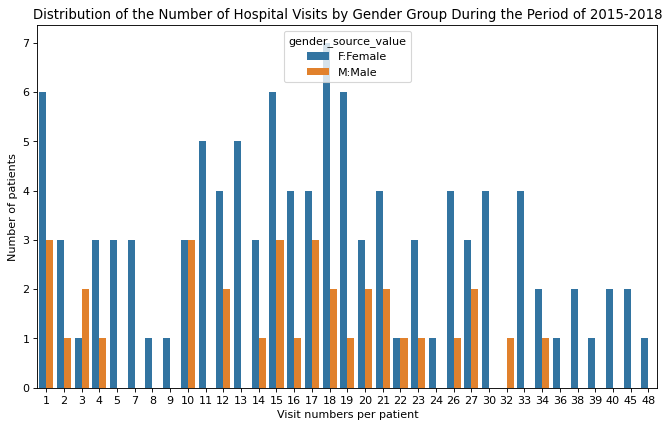

****AVERAGE VISITS PER GENDER GROUP***
gender_source_value
F:Female    18.066038
M:Male      15.382353
Name: count(*), dtype: float64


***T-TEST TO DETERMINE THE MEAN DIFFERENCE BETWEEN GENDER GROUP***
test statistic =  1.2911167126138396
p-value =  0.1988218180225613
Conclusion: There is NO SIGNIFICANT DIFFERENCE in mean visits between gender group


[Q] Quit
[L] List all table name in the database of Hospital
[U] Update data
[P] Calculate average visits per patient and determine any gender difference in visits.
[R] Calculate average ANNUAL visit per provider, specialty and care site, respectively
[C] List top 10 medical conditions
Select menu: R
Type which report type you want to get, provider, specialty, or care site: care site
Type the year you want to see in the report, 2015, 2016, 2017, or 2018:  2015


***Number of Visits by Care Site in 2015


care_site_name
Copiah Health Center                  308
Jackson Hinds Comprehensive Health    185
Utica Clinic                           43
Medical Mall                           18
Vicksburg Warren Clinic                14
Jackson Hinds Central Ms Office         5
South Clinic                            4
Woodrow Wilson                          3
Tougaloo Clinic                         1
dtype: int64



[Q] Quit
[L] List all table name in the database of Hospital
[U] Update data
[P] Calculate average visits per patient and determine any gender difference in visits.
[R] Calculate average ANNUAL visit per provider, specialty and care site, respectively
[C] List top 10 medical conditions
Select menu: C




Top 10 Medical Conditions Diagnosed


,condition_source_value,count(*)
0,I10,1396
1,401.9,896
2,250,686
3,E11.9,577
4,E78.5,414
5,272.4,363
6,401.1,355
7,E11.65,302
8,493.9,165
9,530.81,145


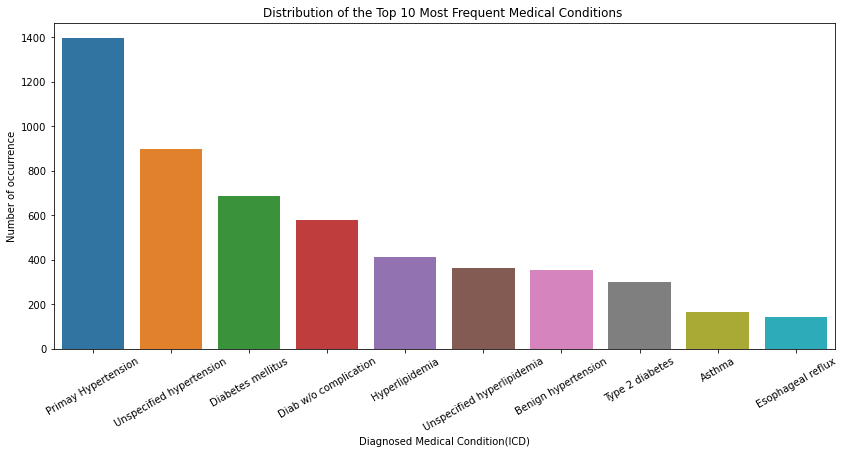



[Q] Quit
[L] List all table name in the database of Hospital
[U] Update data
[P] Calculate average visits per patient and determine any gender difference in visits.
[R] Calculate average ANNUAL visit per provider, specialty and care site, respectively
[C] List top 10 medical conditions
Select menu: Q


In [30]:
##Cell 7


from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import ttest_ind


print('############################')
print('#     Hospital DB          #')
print('############################')
continueProg = True
while (continueProg):
    print('\n')
    print('[Q] Quit')
    print('[L] List all table name in the database of Hospital')
    print('[U] Update data')
    print('[P] Calculate average visits per patient and determine any gender difference in visits.')
    print('[R] Calculate average ANNUAL visit per provider, specialty and care site, respectively')
    print('[C] List top 10 medical conditions')
    
    choice = input('Select menu: ')
    if choice == 'Q': 
        # Q menu is complete. No need to modify.
        continueProg = False
    
    elif choice == 'L':
        
        print('\n')
        print('***The database named Hospital includes the following tables: ***')
        list = pd.read_sql('SELECT name FROM sqlite_master', conn)
        display(list)
        
        
    elif choice == 'U':
        table_name = input('Type table name you whant to update the information, ex, person:   ') #Table name = ' person'
        col_name =  input('Type column name for updating, ex, year_of_birth:   ')  # col_name = 'year_of_birth'
        value = input('Type the value you want to change, ex, 1965:   ') #birth year = 1962
        id = input('Type ID, ex, 20180601462:   ')  # Id=20180601462
        sql_q = """UPDATE {0} SET {1}  = {2} WHERE Person_id = {3}""".format(table_name, col_name, value, id)

        c.execute(sql_q)
        conn.commit()

        print('\n')
        print("Record Updated successfully as follows: ")

        # to confirm that updating is correct
        present = pd.read_sql('SELECT * FROM {} where Person_id = {}'.format(table_name, id), conn)
        display(present)

        
        
    elif choice == 'P':
        
        #Join person table on visit table to calculate number of visit per patient
        visitnum=pd.read_sql("""SELECT person.person_id, count(*), gender_source_value
               FROM person
               INNER JOIN visit ON person.person_id = visit.person_id
               GROUP BY person.person_id
               """, conn)
        #Plot number of visits per patient 
        plt.figure(figsize = (10, 6), dpi = 80)

        p=sns.countplot(x='count(*)', hue='gender_source_value', data=visitnum)
        p.set_xlabel("Visit numbers per patient")
        p.set_ylabel("Number of patients")
        
        # giving a title to my graph
        plt.title('Distribution of the Number of Hospital Visits by Gender Group During the Period of 2015-2018')
 
        # function to show the plot
        plt.show()
        
      
        # Calculate averge number of visits by gender group
        print('****AVERAGE VISITS PER GENDER GROUP***')
        print(visitnum.groupby('gender_source_value')['count(*)'].mean())
        
        # Conduct t-test to determine the gender difference in number of visits 
        print('\n')
        print("***T-TEST TO DETERMINE THE MEAN DIFFERENCE BETWEEN GENDER GROUP***")
        
        #To seperate data by gender group for t-test
        cat1 = visitnum[visitnum['gender_source_value']=='F:Female']
        cat2 = visitnum[visitnum['gender_source_value']=='M:Male']
        ttest_R = ttest_ind(cat1['count(*)'], cat2['count(*)'])
        print('test statistic = ', ttest_R.statistic)
        print('p-value = ', ttest_R.pvalue)
        
        #Interpret the result
        if ttest_R.pvalue>0.05:
            print('Conclusion: There is NO SIGNIFICANT DIFFERENCE in mean visits between gender group')
        else:
            print("Conclusion: The mean visits SIGNIFICANTLY differed between male and female")


        

    elif choice == 'R':         
        #Menu [R] is to develop ANNUAL reports acoording to type of provider and year
        
        #Join visit table on tables of caresite and provider to evaluate the performance
        eval=pd.read_sql("""SELECT visit_start_date, visit.provider_id, specialty_source_value, gender_source_value, care_site_name  
               FROM visit
               LEFT JOIN provider ON visit.provider_id = provider.provider_id
               LEFT JOIN caresite ON visit.care_site_id = caresite.care_site_id
               """, conn)    
        #Create derived variable of year of visit using DatetimeIndex() function
        eval['yearofvisit'] = pd.DatetimeIndex(eval['visit_start_date']).year
        
        
        #Develope function to create report by type and year
        def annual_report(year, report_type):
            if report_type == 'provider':
                report_prov =eval[eval['yearofvisit'] == year].value_counts('provider_id')
                print('\n')
                print('***Number of Visits by Provider in {}'.format(year))
                display(report_prov)
    
            elif report_type == 'specialty':
                report_spec =eval[eval['yearofvisit'] == year].value_counts('specialty_source_value')
                print('\n')
                print('***Number of Visits by Specialty in {}'.format(year))
                display(report_spec)
            
            elif report_type == 'care site':
                report_site =eval[eval['yearofvisit'] == year].value_counts('care_site_name')
                print('\n')
                print('***Number of Visits by Care Site in {}'.format(year))
                display(report_site)   
        
        report_type = input("Type which report type you want to get, provider, specialty, or care site: ")
        year = int(input('Type the year you want to see in the report, 2015, 2016, 2017, or 2018:  '))
        annual_report(year=year, report_type=report_type)
        
        
    elif choice == 'C':
        
        #Read condition table
        med_con=pd.read_sql("""SELECT condition_source_value, count(*)
               FROM condition
               GROUP BY condition_source_value
               """, conn) 
        #List top 10 medical condition
        print('\n')
        print('\n')
        print("Top 10 Medical Conditions Diagnosed")
        med_con_10 = med_con.sort_values(by=['count(*)'], ascending=False, ignore_index=True).head(10)
        display(med_con_10)

        # Plot top 10 medical condition
        plt.figure(figsize=(14, 6))
        ax=sns.barplot(x='condition_source_value', y='count(*)', data=med_con_10)
        ax.set_xticklabels(['Primay Hypertension','Unspecified hypertension','Diabetes mellitus','Diab w/o complication','Hyperlipidemia', 'Unspecified hyperlipidemia', 'Benign hypertension', 'Type 2 diabetes', 'Asthma', 'Esophageal reflux'], rotation = 30)
        ax.set_xlabel("Diagnosed Medical Condition(ICD)")
        ax.set_ylabel("Number of occurrence")
        plt.title('Distribution of the Top 10 Most Frequent Medical Conditions ')
        plt.show()
        
        
    else:
        # You do not need to modify this else block. It is complete.
        print('Invalid menu choice. Enter again.')

# 3. Table of Components

In [29]:
#Cell8

import pandas as pd

#Read component data
comp = pd.read_csv('component.csv')

#Align column value to left
left_aligned_comp = comp.style.set_properties(**{'text-align': 'left'})

display(left_aligned_comp)



,Chapter title,Functionality,Location (Cell#)
0,1. Project Description,Project goal and scope of work,(Markdown 1)
1,2. Implementation,nan,nan
2,2.1. Preparing Data,Create connection,Cell 1
3,2.1.1. Registered Patient Data,Read & create person table,Cell 2
4,2.1.2. Hospital Visit Data,Read & create visit table,Cell 3
5,2.1.3. Care Provider Data,Read & create provider table,Cell 4
6,2.1.4. Care Site Data,Read & create care site table,Cell 5
7,2.1.5. Medical Condition Data,Read & create condition table,Cell 6
8,2.2. User Menu,User interaction,Cell 7
9,3. Table of Components,Contents,Cell 8


(Markdown 2)

# 4. Implementation Result
Implementation of the program started with data preparation. Data for the program included 5 csv datasets extracted from a hospital database. Each csv file was converted to a Pandas DataFrame (via pd.read_csv()) which was inserted into a table created in SQL database named hospital. Sqlite3 connect function was used to connects to a database of Hospital and curso() function was to create and update table.  ".to_sql()" function was used to transfer Pandas data to SQL table. Successful data preparation was confirmed by presenting table through pd.read_sql() function. The details of successfully prepared data presented in the table below:


                SQL Table Name	# of Columns	# of Records	Major Information
Patient data	person	              18	         140	    age (date of birth), race, gender
Visit	        visit	              17	        2452	    visit date, visit number, type
Care site	    care_site	           6	          13	    site name, location
Provider	    provider	          12	          66	    provider ID, name, gender, specialty 
Condition	    condition	          15	        8912	    medical condition(ICD), status


User Menu included 5 choices excluding 'Quit'. The first menu [L] was to list all tables in the hospital database. We executed '''SELECT name FROM sqlite_master WHERE type='table';''' to get sqlite master table which included table name. We printed only table names on the database.

The menu [U] was to update data in the SQL tables. Four input() functions were used to receive the information on table name, column name, value to update, and person ID. The menu was intended to update any value of any column in any table which included person_id. Updated information could be confirmed from a table returned through pd.read_sql() function. 

Menu [P] was to calculate average visits per patient and determine any gender difference in hospital visits. We joined person table on visit table and then calculate number of visit per patient by using count() and groupby() in SQL. The new created SQL table was assigned to the Pandas DataFrame which was used for plotting chart and conducting statistical analysis to determine any gender difference in hospital visits. Count plot in the Seaborn library was presented to graphically show the distribution of patients by number of visits by gender group. We presented the mean of hospital visits for each gender group and conducted a two independent sample t-test to determine its statistcal difference. we used IF-ELSE to appropriately interpret the result of t-test according to p-value (=<.05 for 'significantly differnce' and >0.05 for 'not statistically different').

Menu [R] was to create ANNUAL report for visit per provider, specialty and care site, respectively, which can be used to evaluate performance of care-givers by year. First, we joined visit table on tables of caresite and provider and assigned to Pandas dataframe for the further use of report generation. Visit year was derived from visit_start_date column using pd.DatetimeIndex().year function. To increase the variety of the Annual reports, we defined a 'annual_report()' function which allowed to create a total of 12 different reports (3 care-givers and 4 different years). Function call was executed by user information for type of care-giver and year through input() fuction.

Menu [C] was to list and plot top 10 most frequent medical conditions. We read condition table using pd.read_sql(). and counted cases per medical condition using count(*) function and groupby commend in SQL. Assigned table was sorted by desending order of count(*) which returned a table showing most frequent condition first. We used 'head(10)' to show only top 10 most frequent conditions.  Barplot in the Seaborn library was used to graphically present the top 10 conditions. We set the xtick label to legible medical condition name, instead ICD (International classification of disease) code. For clear view of xtick, we rotated them by 30 degree.  




(Markdown 3)

# 5. Discussion

This program was intended to provide an interactive analytical tools for users who want to describe target market for medical industry and evaluate the performance of care-givers. This program focused on achieving 1) **REALITY** in implementing the program by using real hospital data, 2) **FLEXIBILITY** by using various user inputs when updating values of data, 3) **VARIABILITY** in generating annual reports by using the defined function, and 4) **VISIBILITY** in presenting the results of the analyses by using the Seaborn charts. As seen in the results, the program achieved the intended goals well. However, we faced some chellenges while implementing the program:

1. We experienced with some failures when we prepared data by using 'with open()' and 'write()' functions with lengthy loop to create table and insert data into table.  However, ".to_sql()" allowed us to get away from the lengthy loop and increase success rate to insert data into table.

2. We recieved an operational error message "table person already exists" when we re-run the program  to re-create table after failing in reading data into SQL table.  We wasted lot of time to find the cause of the problem that we did not include "DROP TABLE IF EXISTS tablename" in the program. It was important to include "DROP TABLE IF EXISTS" in the program as we learned from the class excercise. It is also important to note that we can only execute one statement at a time in "c.execute("  ")".

3. When we implemented menu to present graph/chart, graph did not show up timely. The graph showed up after implemeting the next menu. This was because our program did not include 'plt.show()' function. Therefore, it was important to include show() and display() for showing graph and table timely. 

4. The menu [U] whcih was to update information was not working for the column with text information but working very well for the column with numeric information. Further work is needed to resolve this problem.

Despite minor problem in our program(i.e., unable to update text information), our program, as intended, is an useful tool for those who want to look at the characteristics of target market and evaluate the performance of care-givers. The results created from our analytical tool can be used, for example, for **personel management** (ex, which specialty of doctors should be recruited more?)  and **resource allocation** (ex, which specialty of doctor should be assigned to which care site?). The resutls are also useful for policy makers who want to prepare **new plan responding to market change**. 